## Pharmaceutical Sector Stock Analysis
###  Download Stock prices of 4 big companies
- ABT Abbott Laboratories
- JNJ Johnson & Johnson
- PFE Pfizer Inc
- RHHVF Roche Holding AG 
### Source: yahoo finance
library used <b>yfinance</b>

Import necessary libraries

In [17]:
import numpy as np
import pandas as pd
from datetime import datetime
from pandas import to_datetime
import yfinance as yf
import warnings

Download 4 stocks 

In [18]:
warnings.filterwarnings("ignore")
pd.options.display.float_format = '{:.4%}'.format

# Date range
start = '2005-01-01'
end = datetime.now().__format__('%Y-%m-%d')

# Tickers of assets
assets = ['ABT', 'JNJ', 'PFE', 'RHHVF']
assets.sort()

# Downloading data
data = yf.download(assets, start = start, end = end)
data = data.loc[:,('Adj Close', slice(None))]
data.columns = assets

[*********************100%***********************]  4 of 4 completed


In [19]:
# Calculating returns
Y = data[assets].pct_change().dropna()
display(Y.head())

,ABT,JNJ,PFE,RHHVF
Date,,,,
2009-02-17,-1.8384%,-1.9614%,-2.2634%,-0.9901%
2009-02-18,0.5006%,-0.2680%,-0.6316%,-0.8000%
2009-02-19,0.4797%,0.1791%,-0.9181%,0.0000%
2009-02-20,-0.7895%,-1.4783%,-2.2808%,0.0000%
2009-02-23,-1.1660%,-1.8298%,-3.2093%,0.0000%


Get other data for the last month from yahoo finanace - history returns Dividends	Stock Splits

In [20]:
msft = yf.Ticker("RHHVF")
msft.fast_info
# get historical market data
hist = msft.history(period="1mo")
# show meta information about the history (requires history() to be called first)
msft.history_metadata
# show actions (dividends, splits, capital gains)
msft.actions
msft.dividends
msft.splits
msft.get_shares_full(start="2023-03-17", end=None)
msft.major_holders
msft.institutional_holders
msft.mutualfund_holders

,Holder,Shares,Date Reported,% Out,Value
0,Vanguard International Stock Index-Total Intl ...,9219286,2022-10-30,1.3100%,2592168199
1,Vanguard Tax Managed Fund-Vanguard Developed M...,5160487,2022-09-29,0.7300%,1450963805
2,iShares Core MSCI EAFE ETF,3731444,2022-12-30,0.5300%,1049162643
3,Dodge & Cox International Stock Fund,3311200,2022-12-30,0.4700%,931003479
4,iShares MSCI Eafe ETF,2254203,2022-12-30,0.3200%,633809747
5,Vanguard/Primecap Fund,1722423,2022-09-29,0.2500%,484290228
6,Fidelity International Index Fund,1748387,2022-11-29,0.2500%,491590474
7,MFS International Growth Fund,1685557,2022-11-29,0.2400%,473924689
8,Fidelity Series International Growth Fund,1594164,2022-12-30,0.2300%,448227902
9,MFS Research International Fund,1515423,2022-11-29,0.2200%,426088452


Read saved data from local file in percent change format

In [21]:
data = pd.read_csv("/home/becode/Desktop/Time Series/venv/scr/data/yfin_AdjClose.csv", index_col='Date')
Y = data.pct_change().dropna()
display(Y.head())

,ABT,JNJ,PFE,RHHVF
Date,,,,
2009-02-17,-1.8383%,-1.9615%,-2.2634%,-0.9901%
2009-02-18,0.5006%,-0.2679%,-0.6316%,-0.8000%
2009-02-19,0.4797%,0.1791%,-0.9181%,0.0000%
2009-02-20,-0.7895%,-1.4783%,-2.2808%,0.0000%
2009-02-23,-1.1660%,-1.8298%,-3.2094%,0.0000%


Remove (negative) infinite numbers from data, create DataFrame for a single stock

In [22]:
data = pd.read_csv("/home/becode/Desktop/Time Series/venv/scr/data/yfin_AdjClose.csv", index_col='Date')
data = data.replace([np.inf, -np.inf], np.nan)
# select only RHHVF (Roche)
#Y = data.iloc[:,[3]].pct_change().dropna()

# compute relative values to the whole of percent change of ABT(Abbott Labs)
Y = data.iloc[:,:1].pct_change().dropna()
print(data.iloc[:,:1].shape)
print(type(data.iloc[:,:1]))
Y = Y.sample(10)
Y.head()

(4584, 1)
<class 'pandas.core.frame.DataFrame'>


,ABT
Date,
2013-10-01,1.7777%
2008-08-25,-1.2312%
2013-02-21,-0.7532%
2022-06-30,-0.4125%
2007-08-15,-0.2287%


Clean negative values, drop null values, Check again for np.nan and infinite values

In [23]:
Y = data.pct_change().dropna()
Y = Y.replace([np.inf, -np.inf], np.nan)
Y = Y.dropna()
print(np.isnan(Y).sum())
print(np.isfinite(Y).sum())

ABT      0
JNJ      0
PFE      0
RHHVF    0
dtype: int64
ABT      3547
JNJ      3547
PFE      3547
RHHVF    3547
dtype: int64


### Visualize data of a single stock

In [24]:
start_date = datetime(2005, 1, 1)
end_date = to_datetime(datetime.now().__format__('%Y-%m-%d'))
df = yf.download( 'JNJ',
    start=start_date,
    end = end_date
)

[*********************100%***********************]  1 of 1 completed


Text(0.5, 0, 'Date')

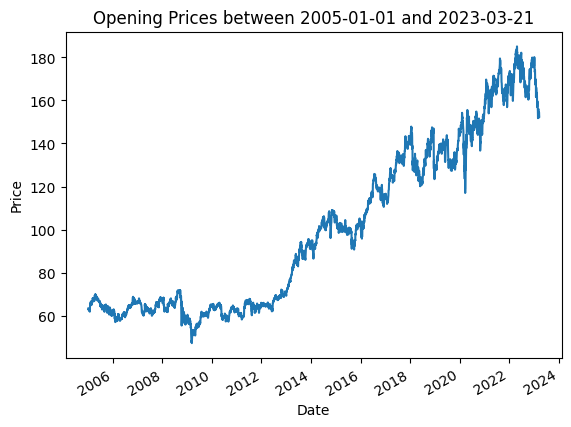

In [25]:
import matplotlib.pyplot as plt
plt.title('Opening Prices between {} and {}'.format(
    start_date.date().isoformat(),
    end_date.date().isoformat()
))
df['Open'].plot()
plt.ylabel('Price')
plt.xlabel('Date')

Resample weekly and compare the results with previous

Date
2005-01-09   6300.9999%
2005-01-16   6282.6000%
2005-01-23   6261.0000%
2005-01-30   6314.8000%
2005-02-06   6519.8000%
Name: Open, dtype: float64

Text(0.5, 0, 'Date')

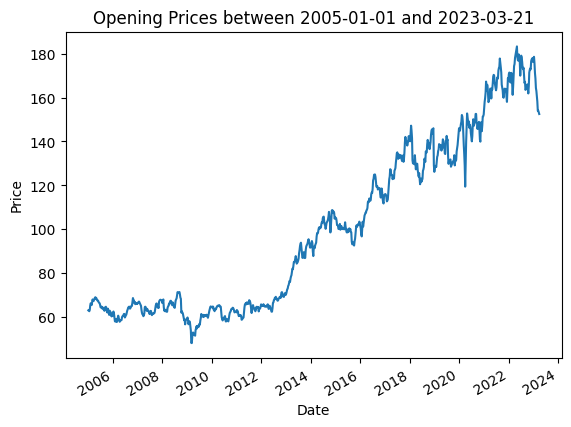

In [26]:
df = df.reset_index().resample('W', on="Date")['Open'].mean()
df = df[df.index.week < 53]
display(df.head())

plt.title('Opening Prices between {} and {}'.format(
    start_date.date().isoformat(),
    end_date.date().isoformat()
))
df.plot()
plt.ylabel('Price')
plt.xlabel('Date')